In [ ]:
# 추세추종 전략
## 이동평균
# 평균회귀 전략
## RSI, 볼린저밴드

import yfinance as yf
import pandas_ta as ta

stock_data = yf.download("^GSPC")  # S&P500지수
stock_data = stock_data.tail(500)  # 최근 500일

In [ ]:
# 단순이동평균
stock_data.loc[:, "SMA_20"] = ta.sma(stock_data["Close"], 20)
stock_data.loc[:, "SMA_60"] = ta.sma(stock_data["Close"], 60)
stock_data.loc[:, "SMA_90"] = ta.sma(stock_data["Close"], 90)

# 지수이동평균
stock_data.loc[:, "EMA_60"] = ta.ema(stock_data["Close"], 60)

In [ ]:
# 단순이동평균, 지수이동평균 그래프 비교
stock_data[["Close", "SMA_60", "EMA_60"]].plot(figsize=(10, 6))

In [ ]:
# 상대강도지수(RSI)
# 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 상승과 하락의 상대적인 강도를 나타낸 지표
# 1. U(Up): 가격이 상승한 날의 상승폭
# 2. D(Down): 가격이 하락한 날의 하락폭
stock_data.loc[:, "RSI_14"] = ta.rsi(stock_data["Close"], 14)
stock_data["RSI_14"].fillna(0, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

flg = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])

# 주가 나타내기
ax1 = plt.subplot(gs[0])
ax1 = stock_data["Close"].plot()
ax1.set_xlabel("")
ax1.axes.xaxis.set_ticks([])

# RSI 나타내기
ax2 = plt.subplot(gs[1])
ax2 = stock_data["RSI_14"].plot(color="black", ylim=[0, 100])
ax2.axhline(y=70, color="r", linestyle="-")
ax2.axhline(y=30, color="r", linestyle="-")
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

In [19]:
# 볼린저밴드 계산하기
import pandas as pd

bb = ta.bbands(stock_data["Close"], 20, 2)[["BBU_20_2.0", "BBM_20_2.0", "BBL_20_2.0"]]

bb = pd.concat([bb, stock_data["Close"]], axis=1)
bb.columns = ["Upper Band", "Mid Band", "Lower Band", "Close"]

<Axes: xlabel='Date'>

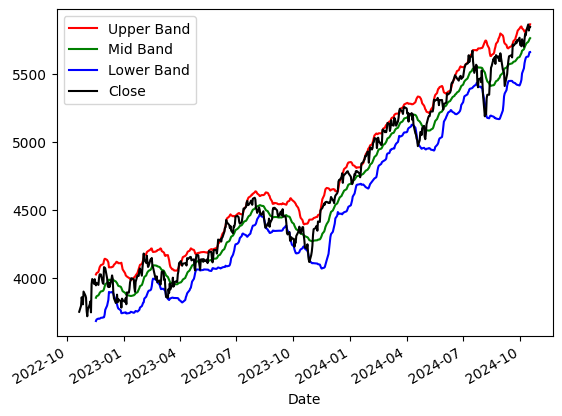

In [21]:
bb.plot(
    color={
        "Upper Band": "red",
        "Lower Band": "blue",
        "Mid Band": "green",
        "Close": "black",
    }
)